 <h1><center>Day 19

### Dicision Tree Classification

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# converting to x and y part
X = titanic[['pclass','age','sex','sibsp','parch','fare']]
y= titanic['survived']

In [4]:
# converting sex to numericle data so it can be easy for machine learning
X.sex = X.sex.map({'male':0,'female':1})

C:\Users\khattak\AppData\Local\Temp\ipykernel_12784\3294987293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.sex = X.sex.map({'male':0,'female':1})


In [5]:
X

,pclass,age,sex,sibsp,parch,fare
0,3,22.0,0,1,0,7.2500
1,1,38.0,1,1,0,71.2833
2,3,26.0,1,0,0,7.9250
3,1,35.0,1,1,0,53.1000
4,3,35.0,0,0,0,8.0500
...,...,...,...,...,...,...
886,2,27.0,0,0,0,13.0000
887,1,19.0,1,0,0,30.0000
888,3,NaN,1,1,2,23.4500
889,1,26.0,0,0,0,30.0000


we can see that we have successfully done that

In [6]:
# finding and removing the null values
X.isnull().sum()

pclass      0
age       177
sex         0
sibsp       0
parch       0
fare        0
dtype: int64

In [7]:
#just age has the null values
X['age'].fillna(X.age.mean(),inplace=True)

C:\Users\khattak\AppData\Local\Temp\ipykernel_12784\617968980.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['age'].fillna(X.age.mean(),inplace=True)
C:\Users\khattak\AppData\Local\Temp\ipykernel_12784\617968980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'].fillna(X.age.mean(),inplace=True)


In [8]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=0)

model = DecisionTreeClassifier(random_state=0)

model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [9]:
Y_predi= model.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test,Y_predi)
accuracy

0.7932960893854749

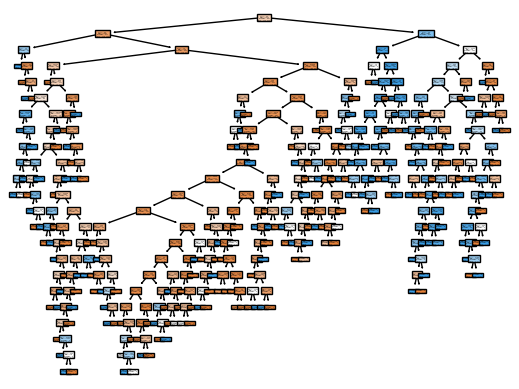

<Figure size 640x480 with 0 Axes>

In [11]:
tree.plot_tree(model.fit(X,y), filled= True)
plt.show()
plt.savefig("distree.png")

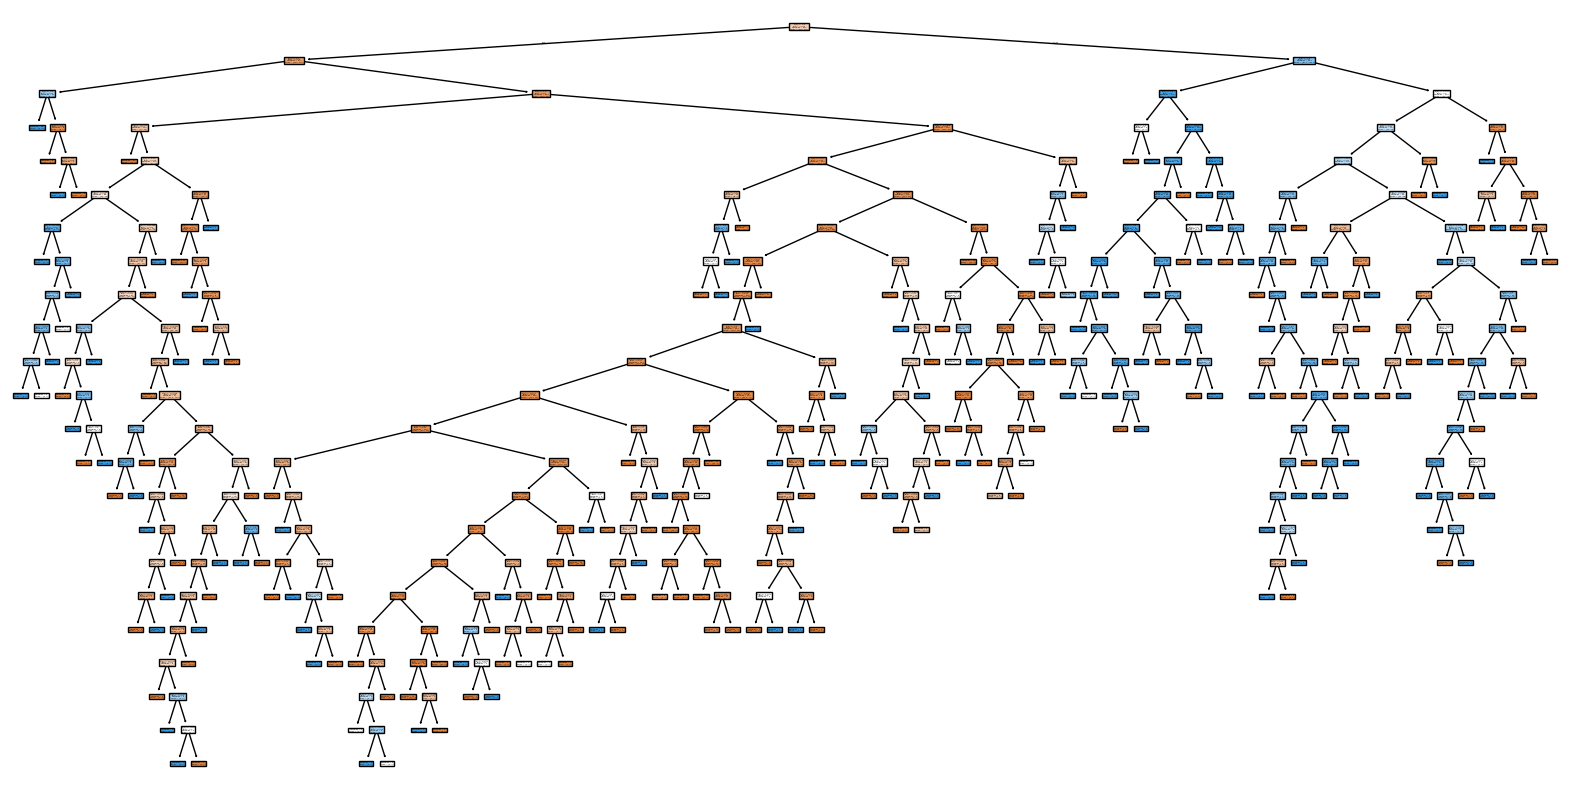

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=(20,10))
tree.plot_tree(model.fit(X,y), filled= True)
plt.show()
plt.savefig("distree.pdf", format="pdf" ,dpi= 300)


**Evaluating the results**

In [13]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [14]:
ps1 = precision_score(y_test,Y_predi)
rs1 = recall_score(y_test,Y_predi)
f1s1 = f1_score(y_test,Y_predi)


print(f"precision score : {ps1} ")
print(f"recall score : {rs1} ")
print(f"f1 score : {f1s1} ")


precision score : 0.7580645161290323 
recall score : 0.6811594202898551 
f1 score : 0.7175572519083969 


**Precision score** Precision measure the proportion of true postive prediction among all positive prediction\
`or` The number of instances that are relevent, out of the total instances the model retrieved.

**Recall score** Recall measure the proportion of the positive prediction among all actual positive instances(prediction)\
`or`The number of instances which the model correctly identified as relevant out of total relevent instances

**F1 score** It is the mean of both pricision and recall

In [15]:
# checking the confusion matrix of the pricision and recall 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,Y_predi)

print(cm)

[[95 15]
 [22 47]]


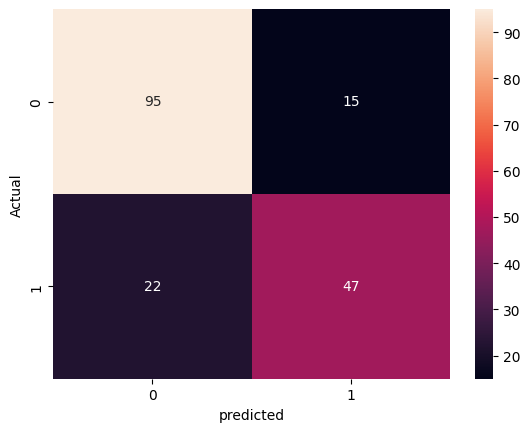

In [16]:
# checking the heatmap
sns.heatmap(cm ,annot=True)
plt.xlabel("predicted")
plt.ylabel('Actual')
plt.show()

___

## Best ways to evaluate the accoracy of a model in Classification

- Accuracy Score
- Recall Score
- Precision Score
- F1 score

___

<center><h1>KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=0)

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train,y_train)

Y_predi= model.predict(X_test)

ps1 = precision_score(y_test,Y_predi)
rs1 = recall_score(y_test,Y_predi)
f1s1 = f1_score(y_test,Y_predi)


print(f"precision score : {ps1} ")
print(f"recall score : {rs1} ")
print(f"f1 score : {f1s1} ")

# checking the confusion matrix of the pricision and recall 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,Y_predi)

print(cm)

precision score : 0.6739130434782609 
recall score : 0.4492753623188406 
f1 score : 0.5391304347826087 
[[95 15]
 [38 31]]


___
<center><h1>Random Forest Classification

In [18]:
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=0)

model = RandomForestClassifier(random_state=0)

model.fit(X_train,y_train)

Y_predi= model.predict(X_test)

ps1 = precision_score(y_test,Y_predi)
rs1 = recall_score(y_test,Y_predi)
f1s1 = f1_score(y_test,Y_predi)


print(f"precision score : {ps1} ")
print(f"recall score : {rs1} ")
print(f"f1 score : {f1s1} ")

# checking the confusion matrix of the pricision and recall 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,Y_predi)

print(cm)

precision score : 0.8135593220338984 
recall score : 0.6956521739130435 
f1 score : 0.75 
[[99 11]
 [21 48]]


___
<center><h1>Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=0)

model = LogisticRegression()

model.fit(X_train,y_train)

Y_predi= model.predict(X_test)

ps1 = precision_score(y_test,Y_predi)
rs1 = recall_score(y_test,Y_predi)
f1s1 = f1_score(y_test,Y_predi)


print(f"precision score : {ps1} ")
print(f"recall score : {rs1} ")
print(f"f1 score : {f1s1} ")

# checking the confusion matrix of the pricision and recall 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,Y_predi)

print(cm)

precision score : 0.7538461538461538 
recall score : 0.7101449275362319 
f1 score : 0.7313432835820896 
[[94 16]
 [20 49]]


___
<center><h1>SVM

In [20]:
from sklearn.svm import SVC

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=0)

model = SVC()

model.fit(X_train,y_train)

Y_predi= model.predict(X_test)

ps1 = precision_score(y_test,Y_predi)
rs1 = recall_score(y_test,Y_predi)
f1s1 = f1_score(y_test,Y_predi)


print(f"precision score : {ps1} ")
print(f"recall score : {rs1} ")
print(f"f1 score : {f1s1} ")

# checking the confusion matrix of the pricision and recall 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,Y_predi)

print(cm)

precision score : 0.8064516129032258 
recall score : 0.36231884057971014 
f1 score : 0.5 
[[104   6]
 [ 44  25]]


___
<center><h1>Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=0)

model = GaussianNB()

model.fit(X_train,y_train)

Y_predi= model.predict(X_test)

ps1 = precision_score(y_test,Y_predi)
rs1 = recall_score(y_test,Y_predi)
f1s1 = f1_score(y_test,Y_predi)


print(f"precision score : {ps1} ")
print(f"recall score : {rs1} ")
print(f"f1 score : {f1s1} ")

# checking the confusion matrix of the pricision and recall 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,Y_predi)

print(cm)

precision score : 0.7222222222222222 
recall score : 0.7536231884057971 
f1 score : 0.7375886524822695 
[[90 20]
 [17 52]]


So these were the main guys in the field of classification plz assigment

- What data validation and cross_val_score , cv Score
- highest model with f1 score

**Assignment 2** for me the it is the random forest classification with f1 score of 0.75

___

Comparing all models to find perfect model

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import sklearn as sl

# define models to be evauluated
models = [LogisticRegression(),SVC(),RandomForestClassifier(),KNeighborsClassifier()]
model_names = ['LogisticRegression','SVC','RandomForestClassifier','KNN']

# perform k-fold cross viladation for each model

k = 10

for a ,model_names in zip (models, model_names):
    cv_score = cross_val_score(model,X_train ,y_train , cv= k)
    
    print(f'{model_names} CV Accuracy : {np.mean(cv_score):.3f}+/-{np.std(cv_score):.3f}')

LogisticRegression CV Accuracy : 0.709+/-0.038
SVC CV Accuracy : 0.709+/-0.038
RandomForestClassifier CV Accuracy : 0.709+/-0.038
KNN CV Accuracy : 0.709+/-0.038
